In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import os

In [5]:
# Load the data from CSV files
application_data = pd.read_csv(os.path.join("loan_defaulter", 'application_data.csv'))
previous_application = pd.read_csv(os.path.join("loan_defaulter", 'previous_application.csv'))

In [6]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


# **Khám phá bộ dữ liệu ban đầu**

**Phân chia các nhóm thu nhập cho khách hàng đi vay tiền**

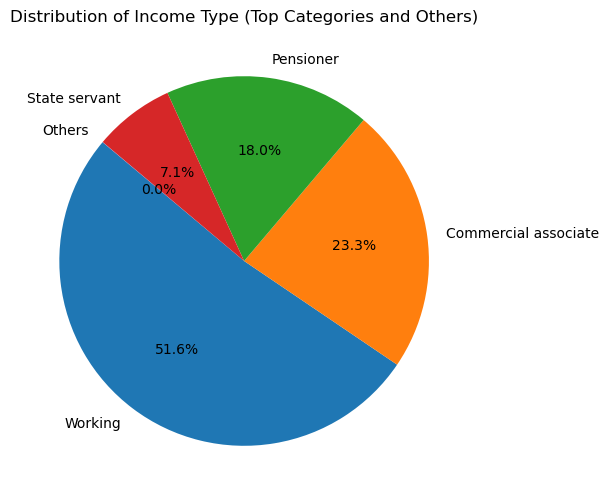

In [318]:
# Define the number of most popular categories to display
n = 4  # You can change this to any other number

# Calculate the proportion of each income type
income_type_counts = application_data['NAME_INCOME_TYPE'].value_counts()

# Keep the top n categories and group others into "Others"
top_income_types = income_type_counts.head(n)
others = income_type_counts[n:].sum()
top_income_types['Others'] = others

# Plot as a pie chart
plt.figure(figsize=(10, 6))
top_income_types.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Income Type (Top Categories and Others)")
plt.ylabel("")  # Removes the default y-axis label
plt.show()


**Phân chia tình trạng gia đình(hôn nhân) cho khách hàng đi vay tiền**

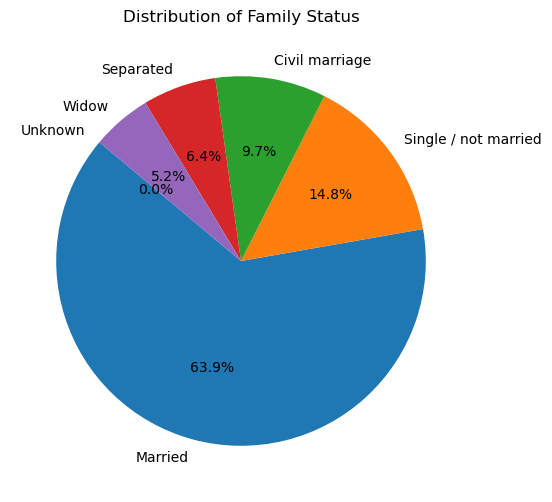

In [313]:
# Calculate the proportion of each family status
family_status_counts = application_data['NAME_FAMILY_STATUS'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(10, 6))
family_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Family Status")
plt.ylabel("")  # Removes the default y-axis label
plt.show()

**Với mỗi khách hàng đến vay tiền ngân hàng thời điểm hiện tại, vẽ bảng phân bố số lượng khoản vay mà những khách hàng đó đã đến vay trước đó**

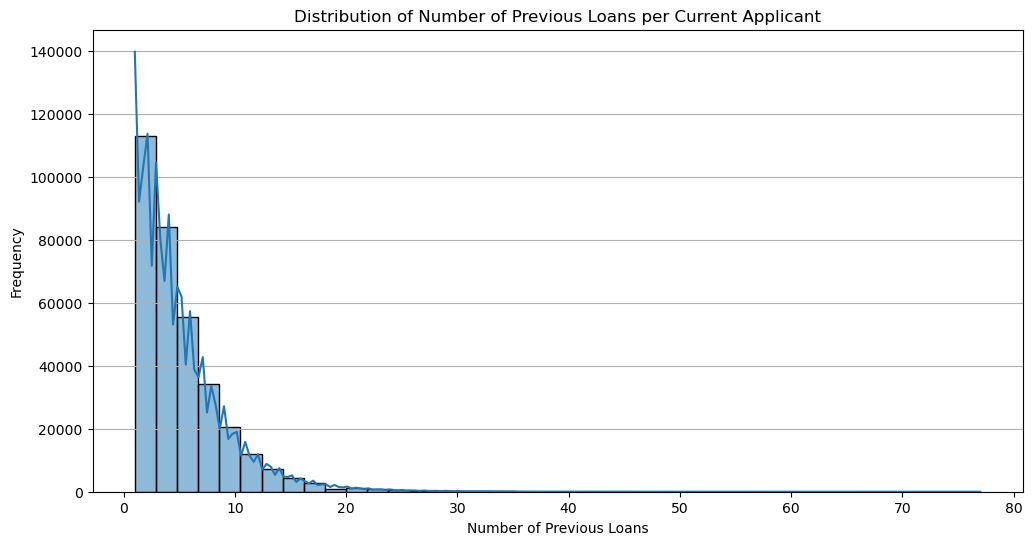

In [297]:
# Count the number of previous loans per current applicant (SK_ID_CURR)
previous_loan_counts = previous_application.groupby('SK_ID_CURR').size()

# Plot the distribution of previous loan counts
plt.figure(figsize=(12, 6))
sns.histplot(previous_loan_counts, bins=40, kde=True)
plt.title("Distribution of Number of Previous Loans per Current Applicant")
plt.xlabel("Number of Previous Loans")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

**Phân bố tình trạng của tất cả những khoản vay trước đây của tất cả các khách hàng hiện tại**

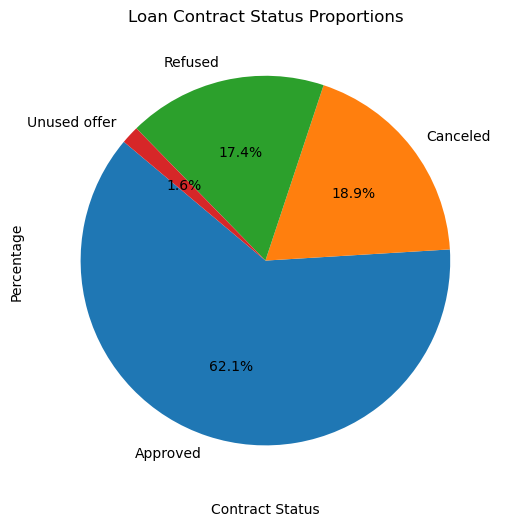

In [314]:
# Calculate the frequency of each contract status
contract_status_counts = previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100

# Plot as a bar chart
plt.figure(figsize=(10, 6))
contract_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Loan Contract Status Proportions")
plt.xlabel("Contract Status")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Phân loại những khoản vay trước đây của tất cả các khách hàng hiện tại**

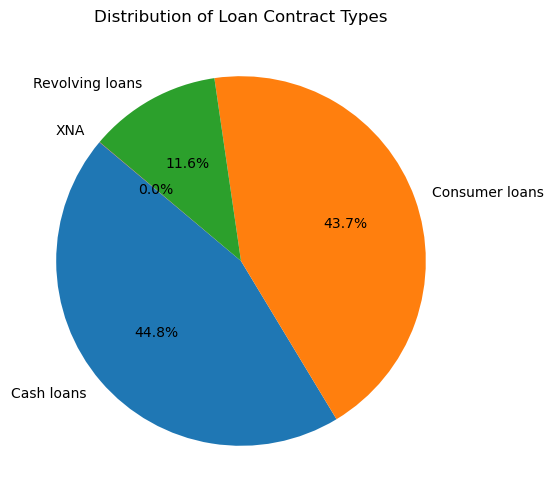

In [305]:
# Calculate proportions of each contract type
contract_type_counts = previous_application['NAME_CONTRACT_TYPE'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(10, 6))
contract_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Loan Contract Types")
plt.ylabel("")  # Removes the default y-axis label
plt.show()

# **Tìm hiểu về tỉ lệ không trả được nợ(Default Rate), dựa trên dữ liệu về những khoản vay hiện tại**

/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2866189927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accompanying_person_default_rate.index, y=accompanying_person_default_rate.values, palette='coolwarm')


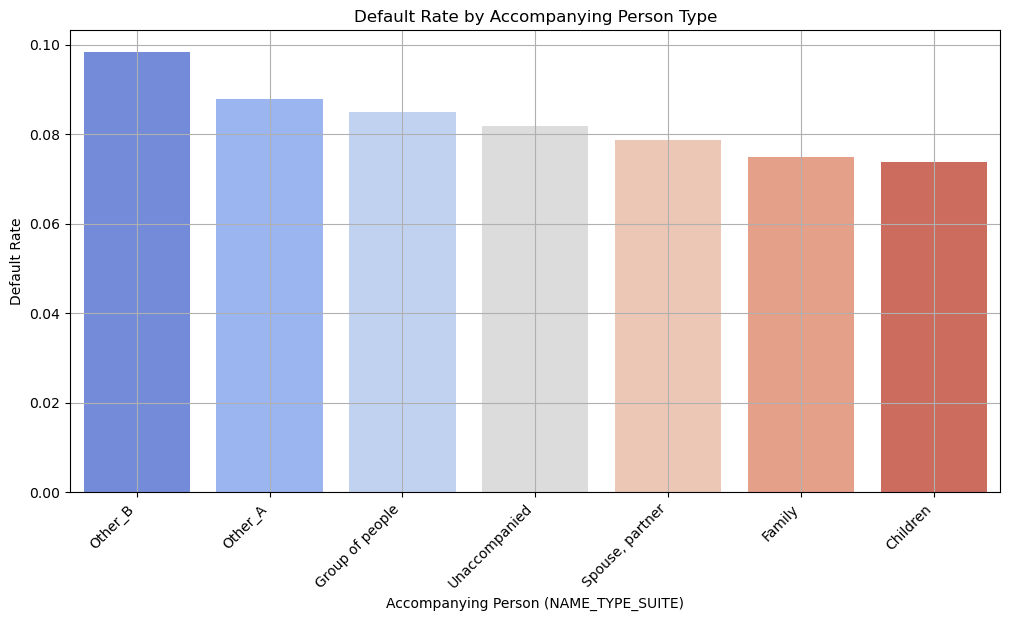

In [57]:
# Calculate the default rate for each type of accompanying person
accompanying_person_default_rate = application_data.groupby('NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False)

# Plotting the default rate for each accompanying person type
plt.figure(figsize=(12, 6))
sns.barplot(x=accompanying_person_default_rate.index, y=accompanying_person_default_rate.values, palette='coolwarm')
plt.title("Default Rate by Accompanying Person Type")
plt.xlabel("Accompanying Person (NAME_TYPE_SUITE)")
plt.ylabel("Default Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Tỷ lệ vỡ nợ theo số lần vỡ nợ trong vòng kết nối xã hội (30 ngày)

Biểu đồ dưới đây minh họa mối quan hệ giữa số lần vỡ nợ trong vòng kết nối xã hội của người vay trong 30 ngày và tỷ lệ vỡ nợ. Trục hoành biểu diễn số lần vỡ nợ của các mối quan hệ xã hội của người vay, trong khi trục tung cho thấy tỷ lệ vỡ nợ tương ứng. Quan sát này có thể giúp xác định ảnh hưởng của các mối quan hệ xã hội lên khả năng vỡ nợ của người vay, từ đó đưa ra các chiến lược phân tích và quản lý rủi ro tín dụng.


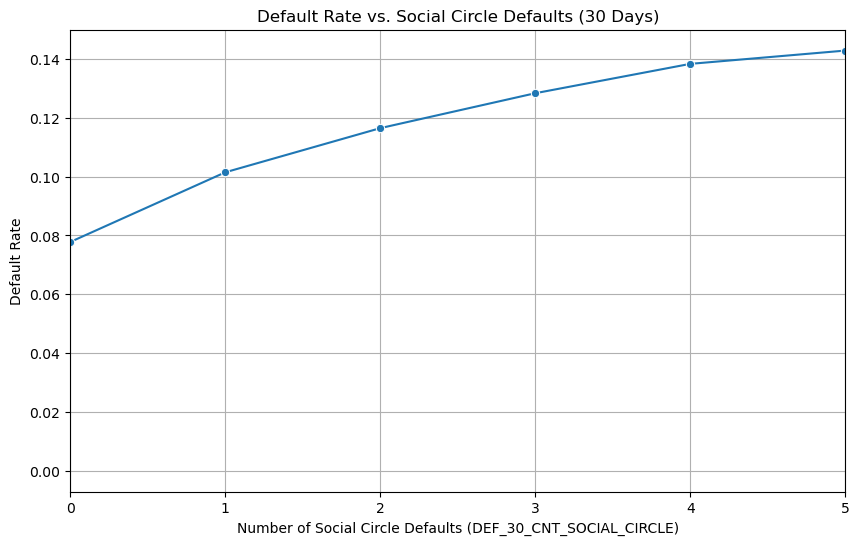

In [69]:
# Calculate the default rate for each value of DEF_30_CNT_SOCIAL_CIRCLE
social_circle_default_rate = application_data.groupby('DEF_30_CNT_SOCIAL_CIRCLE')['TARGET'].mean()

# Line plot to show the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x=social_circle_default_rate.index, y=social_circle_default_rate.values, marker='o')
plt.title("Default Rate vs. Social Circle Defaults (30 Days)")
plt.xlabel("Number of Social Circle Defaults (DEF_30_CNT_SOCIAL_CIRCLE)")
plt.ylabel("Default Rate")
plt.grid(True)
plt.xlim(0, 5)
plt.show()


### Tỷ lệ vỡ nợ theo loại sở hữu tài sản (xe hơi và bất động sản)

Biểu đồ dưới đây minh họa tỷ lệ vỡ nợ theo bốn nhóm sở hữu tài sản của người vay, dựa trên việc họ sở hữu xe hơi, bất động sản, cả hai, hoặc không có tài sản nào. Trục hoành biểu diễn các loại sở hữu tài sản khác nhau, trong khi trục tung thể hiện tỷ lệ vỡ nợ tương ứng. Quan sát này có thể cung cấp cái nhìn sâu hơn về mối quan hệ giữa tài sản sở hữu và khả năng vỡ nợ, giúp phát hiện các yếu tố rủi ro và đưa ra các quyết định tín dụng hiệu quả.


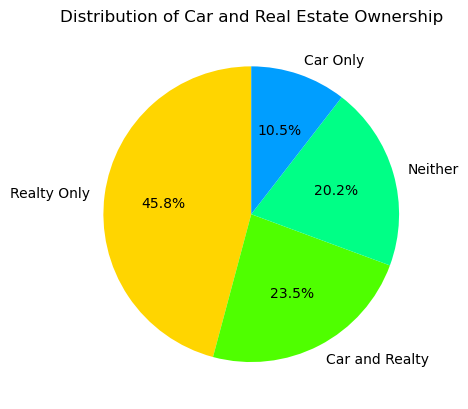

In [86]:
application_data['ASSET_OWNERSHIP'] = application_data.apply(
    lambda x: 'Car and Realty' if x['FLAG_OWN_CAR'] == "Y" and x['FLAG_OWN_REALTY'] == "Y" else
              'Car Only' if x['FLAG_OWN_CAR'] == "Y" else
              'Realty Only' if x['FLAG_OWN_REALTY'] == "Y" else 'Neither', axis=1)
asset_counts = application_data['ASSET_OWNERSHIP'].value_counts()
asset_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("hsv"))
plt.title("Distribution of Car and Real Estate Ownership")
plt.ylabel("")
plt.show()


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2768382638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_ownership.index, y=default_rate_by_ownership.values, palette='viridis')


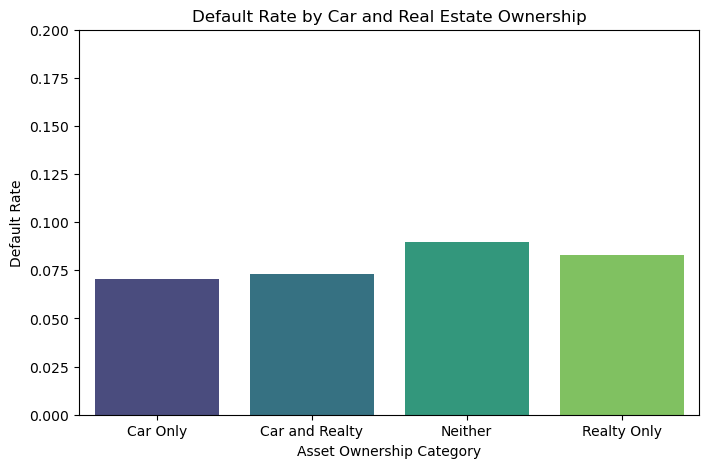

In [89]:
# Calculate the default rate for each asset ownership category
default_rate_by_ownership = application_data.groupby('ASSET_OWNERSHIP')['TARGET'].mean()

# Plot the default rate for each ownership category
plt.figure(figsize=(8, 5))
sns.barplot(x=default_rate_by_ownership.index, y=default_rate_by_ownership.values, palette='viridis')
plt.title("Default Rate by Car and Real Estate Ownership")
plt.xlabel("Asset Ownership Category")
plt.ylabel("Default Rate")
plt.ylim(0, 0.2)  # Scale between 0 and 1 to represent proportions
plt.show()

### Tỷ lệ vỡ nợ theo sự hiện diện của thang máy

Biểu đồ này minh họa mối quan hệ giữa sự hiện diện của thang máy trong các tòa nhà mà người vay sở hữu và tỷ lệ vỡ nợ của họ. Trục hoành biểu diễn hai loại: 0 (không có thang máy) và 1 (có thang máy), trong khi trục tung thể hiện tỷ lệ vỡ nợ tương ứng. Kết quả này có thể giúp chúng ta hiểu thêm về mối liên hệ giữa các tiện nghi cơ bản trong bất động sản của người vay và khả năng xảy ra vỡ nợ, từ đó hỗ trợ quá trình đánh giá rủi ro tín dụng.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2748875812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elevator_default_rate.index, y=elevator_default_rate.values, palette='viridis')


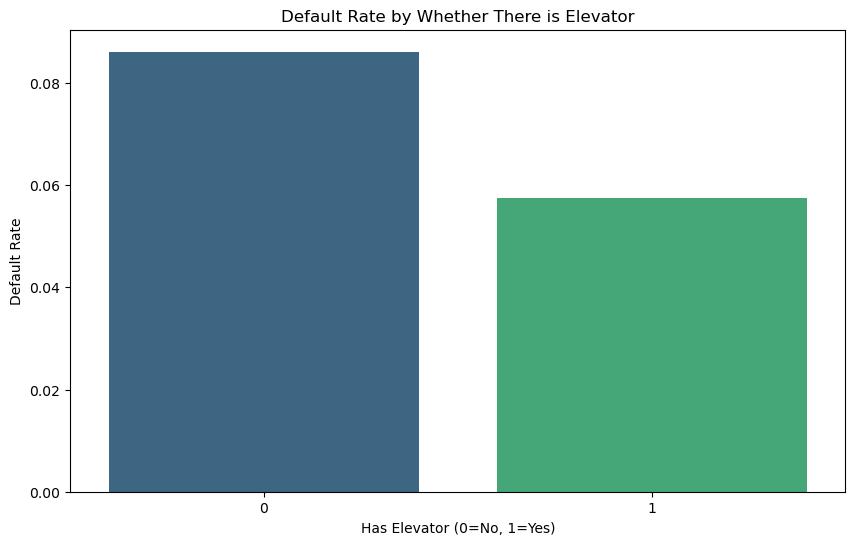

In [329]:
plt.figure(figsize = (10, 6))
application_data['HAS_ELEVATOR'] = application_data['ELEVATORS_AVG'].apply(lambda x: 1 if x > 0 else 0)
elevator_default_rate = application_data.groupby('HAS_ELEVATOR')['TARGET'].mean()
sns.barplot(x=elevator_default_rate.index, y=elevator_default_rate.values, palette='viridis')
plt.title("Default Rate by Whether There is Elevator")
plt.xlabel("Has Elevator (0=No, 1=Yes)")
plt.ylabel("Default Rate")
plt.show()

### Tỷ lệ vỡ nợ theo mật độ dân số khu vực

Biểu đồ này cho thấy mối quan hệ giữa mật độ dân số của khu vực mà người vay sinh sống và tỷ lệ vỡ nợ của họ. Các mức mật độ dân số được chia thành bốn nhóm: thấp, trung bình, cao và rất cao. Thông tin này có thể cung cấp những gợi ý về mức độ rủi ro tín dụng dựa trên đặc điểm khu vực mà người vay đang sinh sống, giúp các tổ chức tài chính điều chỉnh chiến lược tín dụng dựa trên yếu tố địa lý.


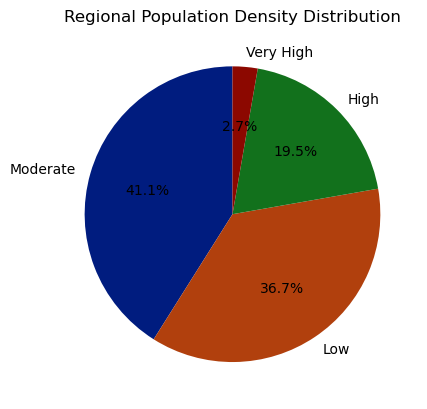

In [115]:
application_data['POPULATION_DENSITY_BIN'] = pd.cut(application_data['REGION_POPULATION_RELATIVE'], bins=[0, 0.015, 0.030, 0.05, 0.2], labels=['Low', 'Moderate', 'High', 'Very High'])
pop_density_counts = application_data['POPULATION_DENSITY_BIN'].value_counts()
pop_density_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("dark"))
plt.title("Regional Population Density Distribution")
plt.ylabel("")
plt.show()

/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1102116154.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_pop_density = application_data.groupby('POPULATION_DENSITY_BIN')['TARGET'].mean()
/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1102116154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_pop_density.index, y=default_rate_by_pop_density, palette='viridis')


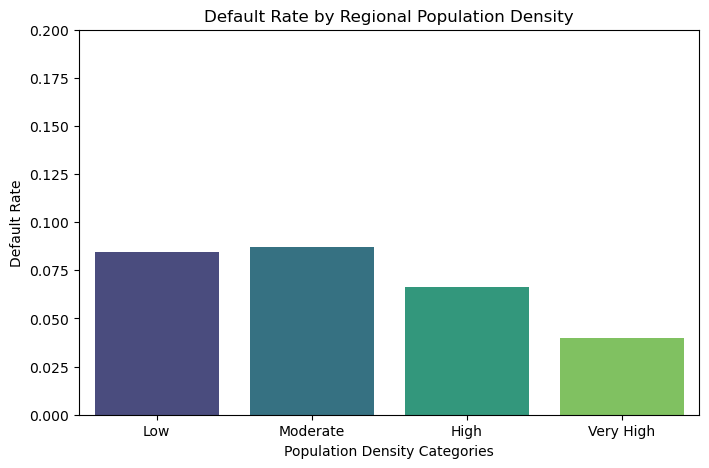

In [120]:
# Calculate the default rate for each asset ownership category
default_rate_by_pop_density = application_data.groupby('POPULATION_DENSITY_BIN')['TARGET'].mean()

# Plot the default rate for each ownership category
plt.figure(figsize=(8, 5))
sns.barplot(x=default_rate_by_pop_density.index, y=default_rate_by_pop_density, palette='viridis')
plt.title("Default Rate by Regional Population Density")
plt.xlabel("Population Density Categories")
plt.ylabel("Default Rate")
plt.ylim(0, 0.2)  # Scale between 0 and 1 to represent proportions
plt.show()

### Tỷ lệ vỡ nợ theo loại vật liệu tường

Biểu đồ này thể hiện mối quan hệ giữa loại vật liệu xây dựng tường nhà của người vay và tỷ lệ vỡ nợ tương ứng. Các loại vật liệu tường bao gồm Block, Mixed, Monolithic, Others, Panel, Stone/Brick và Wooden. Thông tin này có thể hữu ích để hiểu sự liên quan giữa loại vật liệu xây dựng nhà ở và mức độ rủi ro tín dụng, từ đó giúp các tổ chức tài chính điều chỉnh chính sách cho vay phù hợp với các nhóm rủi ro khác nhau.


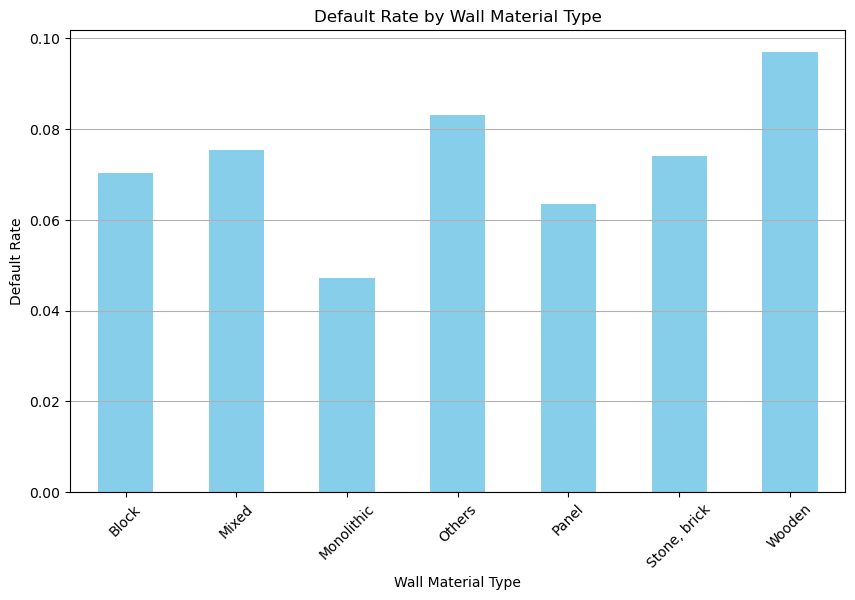

In [145]:
# Calculate the proportion of defaults for each wall material type
wall_material_default_rate = application_data.groupby('WALLSMATERIAL_MODE')['TARGET'].mean()

# Plot as a bar chart
wall_material_default_rate.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Default Rate by Wall Material Type")
plt.xlabel("Wall Material Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


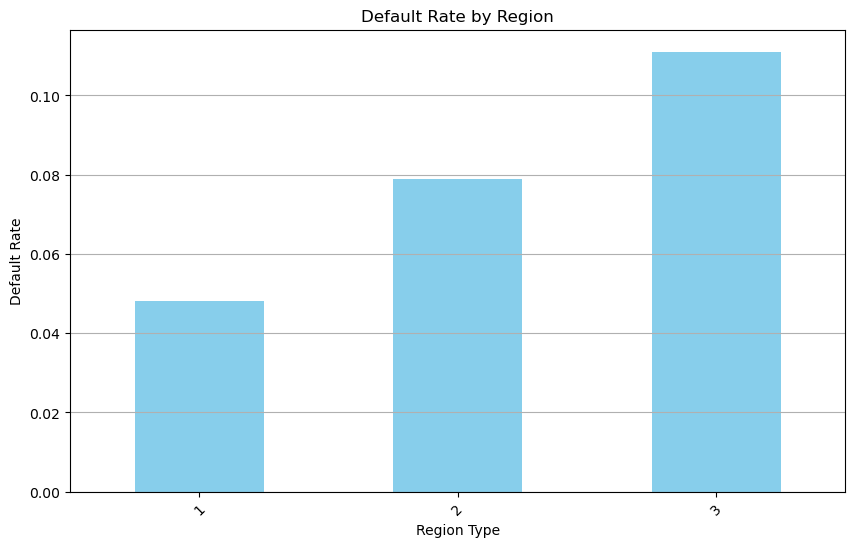

In [322]:
# Calculate the proportion of defaults for each wall material type
regional_rate_default_rate = application_data.groupby('REGION_RATING_CLIENT')['TARGET'].mean()

# Plot as a bar chart
regional_rate_default_rate.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Default Rate by Region")
plt.xlabel("Region Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Tỷ lệ vỡ nợ theo loại hình nhà ở

Biểu đồ này thể hiện mối quan hệ giữa loại hình nhà ở của người vay và tỷ lệ vỡ nợ tương ứng. Các loại nhà ở bao gồm Căn hộ thuê, Ở với cha mẹ, Căn hộ thuộc sở hữu nhà nước, Căn hộ hợp tác, Nhà riêng và Căn hộ văn phòng. Thông tin này có thể cung cấp những hiểu biết quan trọng về sự liên kết giữa loại hình nhà ở và nguy cơ tín dụng, hỗ trợ các tổ chức tài chính trong việc xác định và quản lý rủi ro.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/181554330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_default_rate.index, y=housing_default_rate.values, palette='cividis')


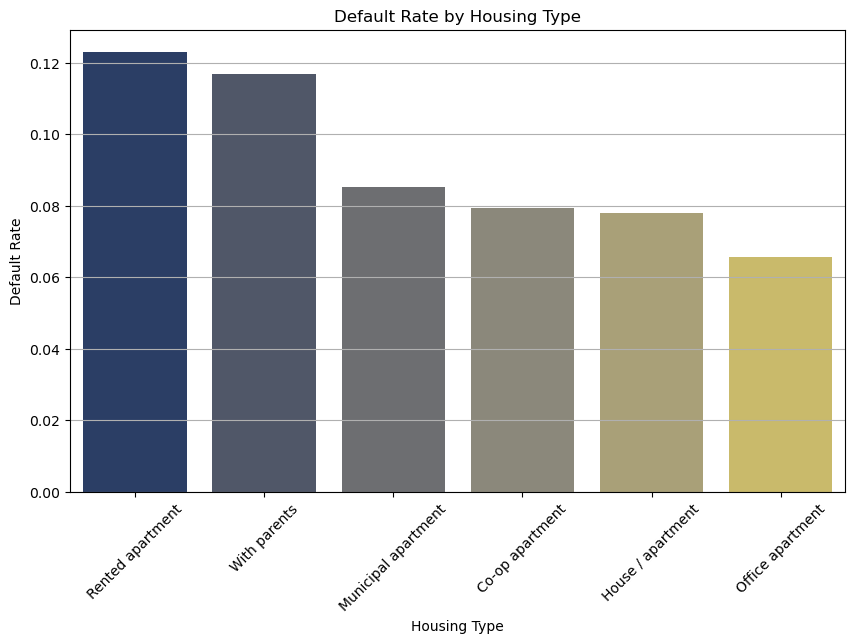

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate default rate for each housing type
housing_default_rate = application_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()
# Sort the values in decreasing order
housing_default_rate = housing_default_rate.sort_values(ascending=False)

# Plot the default rate as a bar chart with a different palette
plt.figure(figsize=(10, 6))
sns.barplot(x=housing_default_rate.index, y=housing_default_rate.values, palette='cividis')
plt.title("Default Rate by Housing Type")
plt.xlabel("Housing Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Tỷ lệ vỡ nợ theo giới tính**

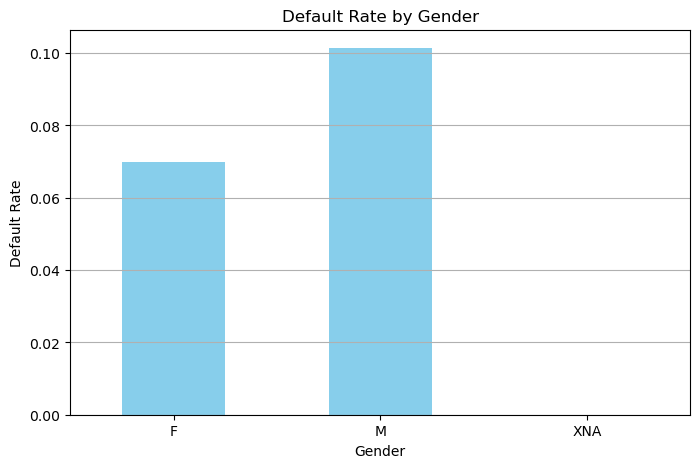

In [172]:
# Calculate the default rate by gender
gender_default_rate = application_data.groupby('CODE_GENDER')['TARGET'].mean()

# Plot as a bar chart
gender_default_rate.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Default Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Default Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Tỷ lệ vỡ nợ theo trình độ học vấn

Biểu đồ thể hiện mối quan hệ giữa trình độ học vấn của người vay và tỷ lệ vỡ nợ tương ứng.


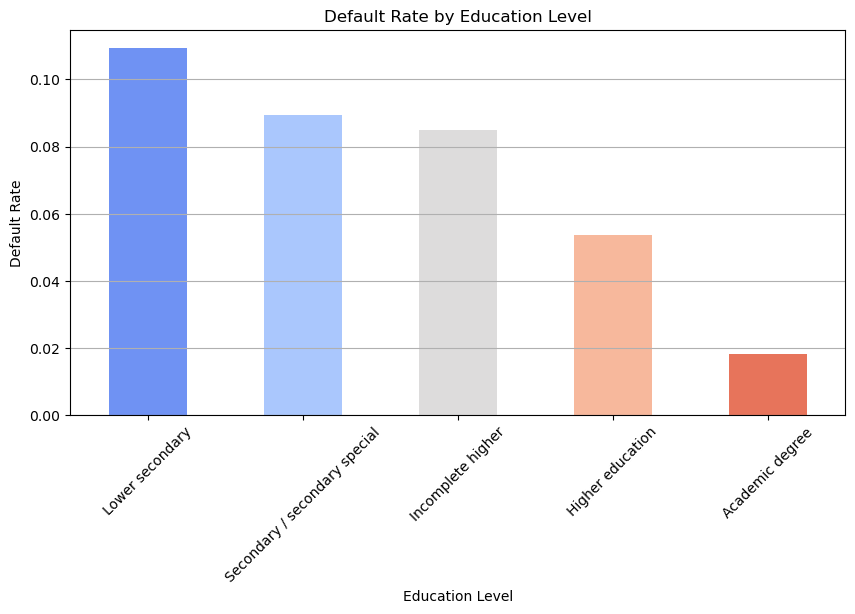

In [324]:
# Calculate the default rate by education level
education_default_rate = application_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

# Sort the values in decreasing order
education_default_rate = education_default_rate.sort_values(ascending=False)

# Generate a color palette
colors = sns.color_palette("coolwarm", len(education_default_rate))

# Plot as a bar chart with sorted values and a color gradient
education_default_rate.plot(kind='bar', color=colors, figsize=(10, 5))
plt.title("Default Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



### Tỷ lệ vỡ nợ theo các nhóm nghề nghiệp phổ biến nhất

Biểu đồ này minh họa tỷ lệ vỡ nợ trong số 10 nhóm nghề nghiệp phổ biến nhất. 


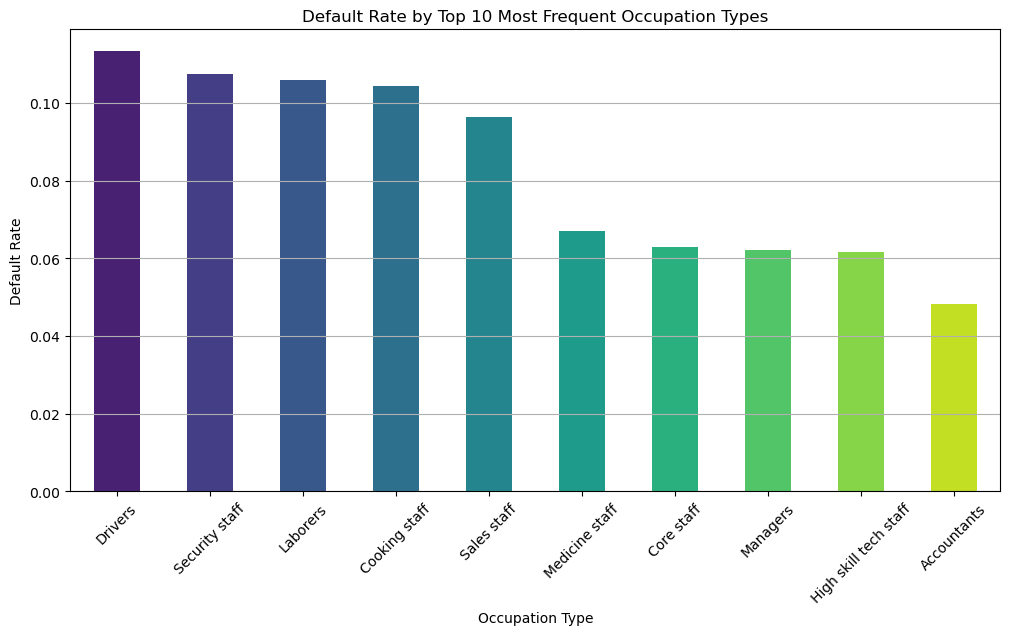

In [236]:
# Calculate the frequency of each occupation type
occupation_counts = application_data['OCCUPATION_TYPE'].value_counts()

# Filter the dataset to include only the top 10 most frequent occupations
top_occupations = occupation_counts.head(10).index
filtered_data = application_data[application_data['OCCUPATION_TYPE'].isin(top_occupations)]

# Calculate the default rate for the top 10 occupations
occupation_default_rate = filtered_data.groupby('OCCUPATION_TYPE')['TARGET'].mean()

# Sort by default rate in decreasing order
occupation_default_rate = occupation_default_rate.sort_values(ascending=False)

# Plot as a bar chart with color gradient
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(occupation_default_rate))  # Generate a color gradient
occupation_default_rate.plot(kind='bar', color=colors)
plt.title("Default Rate by Top 10 Most Frequent Occupation Types")
plt.xlabel("Occupation Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Tỷ lệ vỡ nợ theo các loại thu nhập phổ biến nhất

Biểu đồ này minh họa tỷ lệ vỡ nợ trong số bốn nhóm thu nhập phổ biến nhất.

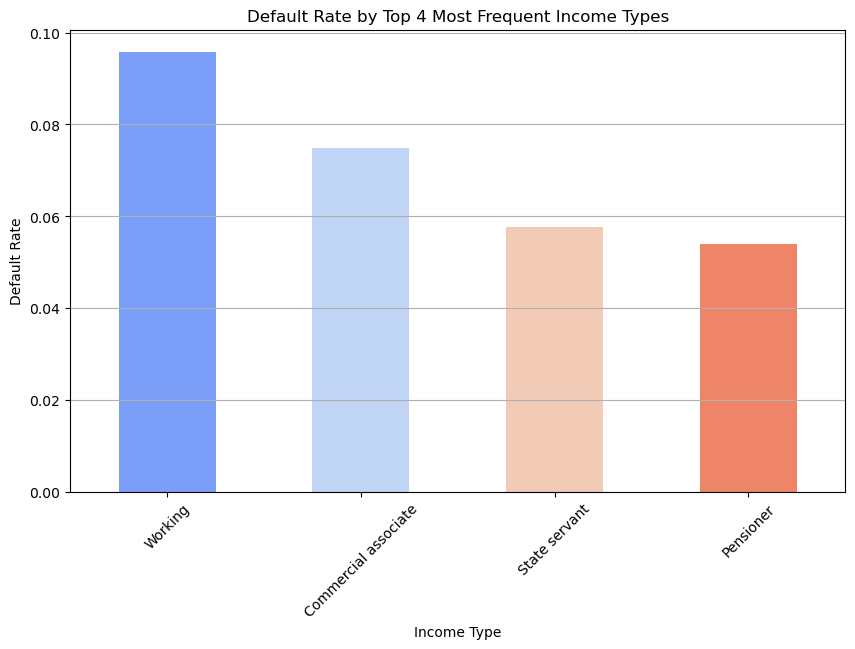

In [319]:
# Calculate the frequency of each income type
income_type_counts = application_data['NAME_INCOME_TYPE'].value_counts()

# Filter the dataset to include only the top 4 most frequent income types
top_income_types = income_type_counts.head(4).index
filtered_data = application_data[application_data['NAME_INCOME_TYPE'].isin(top_income_types)]

# Calculate the default rate for the top 4 income types
income_type_default_rate = filtered_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

# Sort by default rate in decreasing order
income_type_default_rate = income_type_default_rate.sort_values(ascending=False)

# Plot as a bar chart with color gradient
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(income_type_default_rate))  # Generate a color gradient
income_type_default_rate.plot(kind='bar', color=colors)
plt.title("Default Rate by Top 4 Most Frequent Income Types")
plt.xlabel("Income Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Tỷ lệ vỡ nợ theo các loại thu nhập và tình trạng hôn nhân phổ biến

Biểu đồ này minh họa sự khác biệt về tỷ lệ vỡ nợ giữa ba nhóm thu nhập phổ biến nhất (Nhân viên thương mại, Người nghỉ hưu và Người lao động) phân theo tình trạng hôn nhân. 


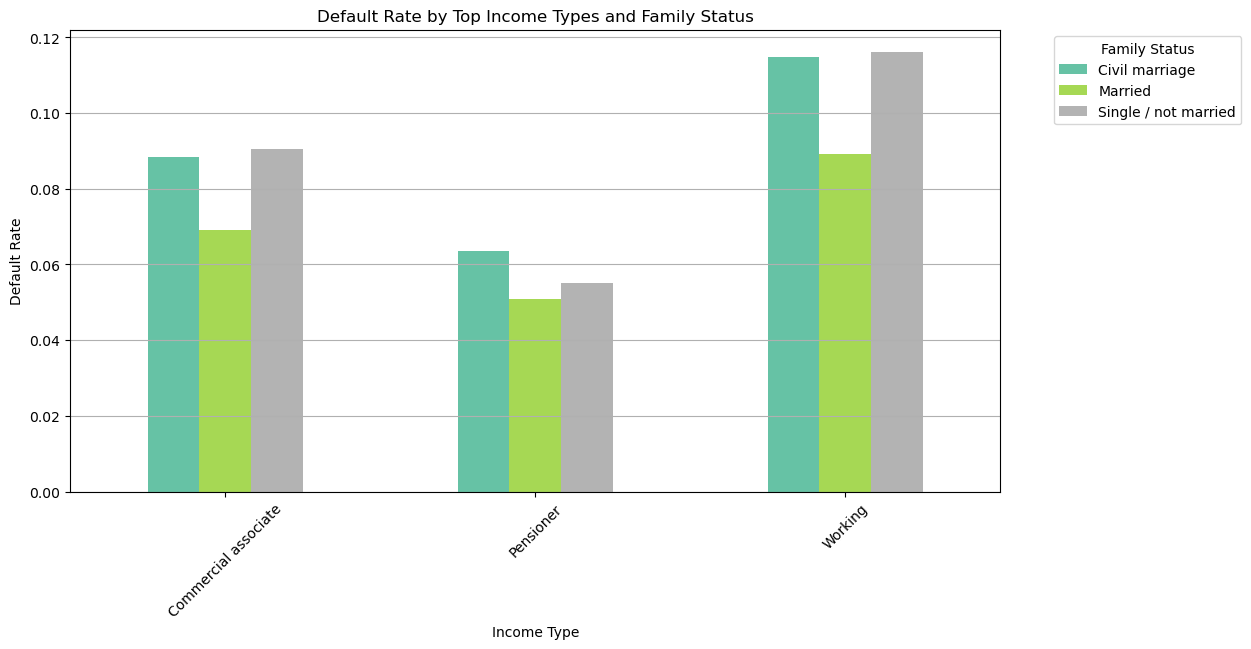

In [189]:
# Find the top 3 most frequent values for NAME_INCOME_TYPE and NAME_FAMILY_STATUS
top_income_types = application_data['NAME_INCOME_TYPE'].value_counts().head(3).index
top_family_statuses = application_data['NAME_FAMILY_STATUS'].value_counts().head(3).index

# Filter the dataset to include only these top categories
filtered_data = application_data[
    (application_data['NAME_INCOME_TYPE'].isin(top_income_types)) & 
    (application_data['NAME_FAMILY_STATUS'].isin(top_family_statuses))
]

# Calculate the default rate by income type and family status
income_family_default = filtered_data.groupby(['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'])['TARGET'].mean().unstack()

# Plot the bar chart
income_family_default.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Default Rate by Top Income Types and Family Status")
plt.xlabel("Income Type")
plt.ylabel("Default Rate")
plt.legend(title="Family Status", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Tỷ lệ vỡ nợ theo khả năng liên lạc qua điện thoại và email

Biểu đồ này so sánh tỷ lệ vỡ nợ giữa các nhóm khách hàng có hoặc không có thông tin liên lạc qua điện thoại và email. 


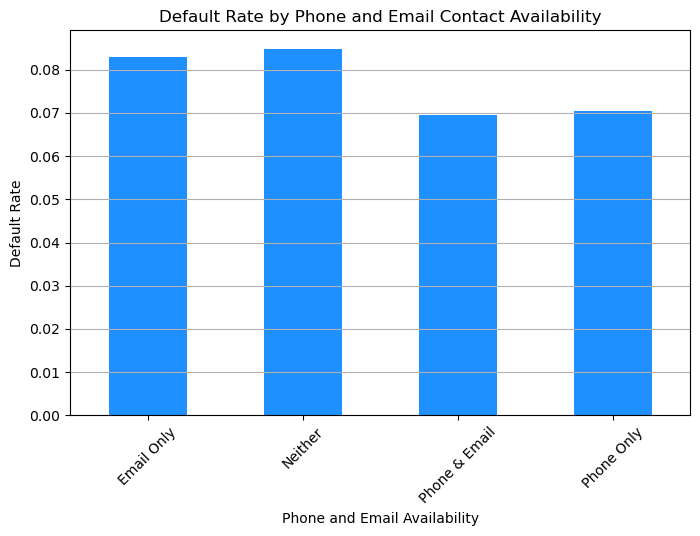

In [188]:
application_data['PHONE_AND_EMAIL'] = application_data.apply(
    lambda x: 'Phone & Email' if x['FLAG_PHONE'] == 1 and x['FLAG_EMAIL'] == 1 else
              'Phone Only' if x['FLAG_PHONE'] == 1 else
              'Email Only' if x['FLAG_EMAIL'] == 1 else 'Neither', axis=1)

contact_default = application_data.groupby(["PHONE_AND_EMAIL"])['TARGET'].mean()

contact_default.plot(kind='bar', color='dodgerblue', figsize=(8, 5))
plt.title("Default Rate by Phone and Email Contact Availability")
plt.xlabel("Phone and Email Availability")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Tỷ lệ vỡ nợ theo tình trạng gia đình và số lượng con

Biểu đồ này cho thấy sự so sánh tỷ lệ vỡ nợ giữa các nhóm khách hàng với tình trạng gia đình khác nhau và số lượng con từ 0, 1, và từ hai con trở lên. Các khách hàng đã kết hôn có tỷ lệ vỡ nợ thấp hơn một chút so với những khách hàng trong hôn nhân dân sự, đặc biệt là đối với những người không có con. Nhìn chung, những khách hàng có từ hai con trở lên có tỷ lệ vỡ nợ cao hơn trong hầu hết các nhóm tình trạng gia đình, cho thấy mối quan hệ tiềm năng giữa trách nhiệm gia đình và rủi ro tài chính.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1978185095.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  children_default_rate = application_data[(application_data["NAME_FAMILY_STATUS"].isin(top_family_status_types))].groupby(['NAME_FAMILY_STATUS',


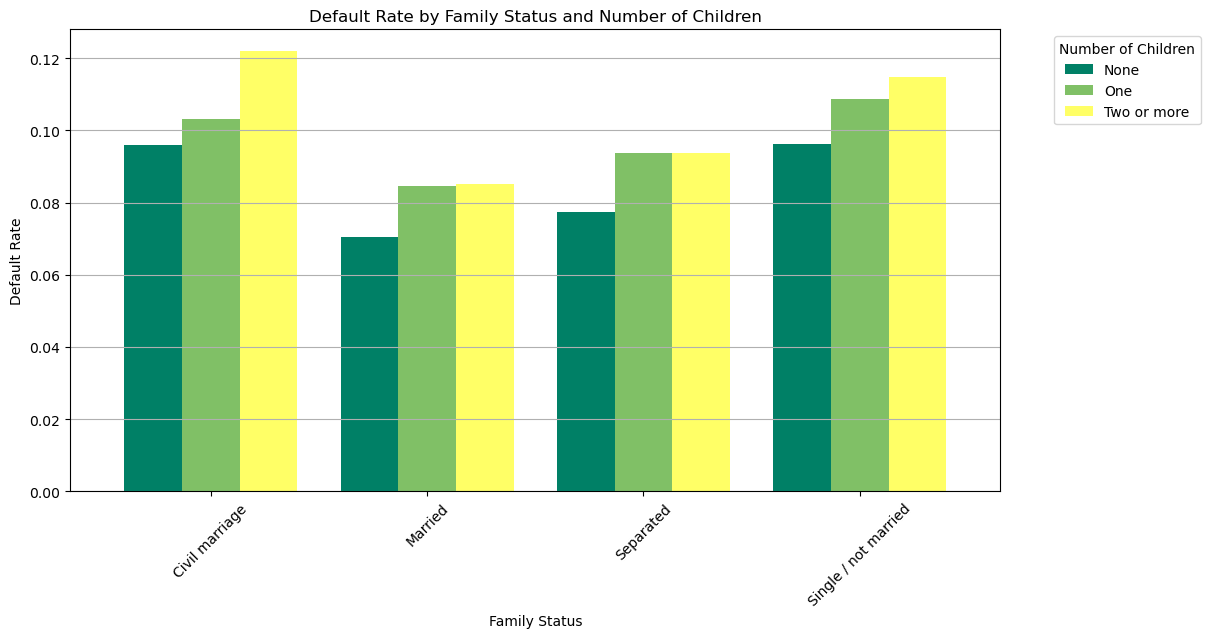

In [199]:
# Bin number of children into categories
application_data['CHILDREN_CAT'] = pd.cut(application_data['CNT_CHILDREN'], bins=[-1, 0, 1, 10], labels=['None', 'One', 'Two or more'])

top_family_status_types = application_data['NAME_FAMILY_STATUS'].value_counts().head(4).index

# Calculate default rate by family status and children category
children_default_rate = application_data[(application_data["NAME_FAMILY_STATUS"].isin(top_family_status_types))].groupby(['NAME_FAMILY_STATUS', 
                                        'CHILDREN_CAT'])['TARGET'].mean().unstack()

# Plot as a grouped bar chart
children_default_rate.plot(kind='bar', figsize=(12, 6), colormap='summer', width=0.8)
plt.title("Default Rate by Family Status and Number of Children")
plt.xlabel("Family Status")
plt.ylabel("Default Rate")
plt.legend(title="Number of Children", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Phân phối của EXT_SOURCE_1, EXT_SOURCE_2 và EXT_SOURCE_3 theo trạng thái mặc định của khoản vay

Biểu đồ này so sánh điểm số của các nguồn bên ngoài (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3) giữa những khách hàng vỡ nợ và không vợ nợ. Các điểm số này đại diện cho các yếu tố bên ngoài có thể ảnh hưởng đến quyết định cho vay, chẳng hạn như điểm tín dụng hoặc các chỉ số khác về tình trạng tài chính của người vay.




/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/4253046923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y=col, palette='coolwarm')
/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/4253046923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y=col, palette='coolwarm')
/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/4253046923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y

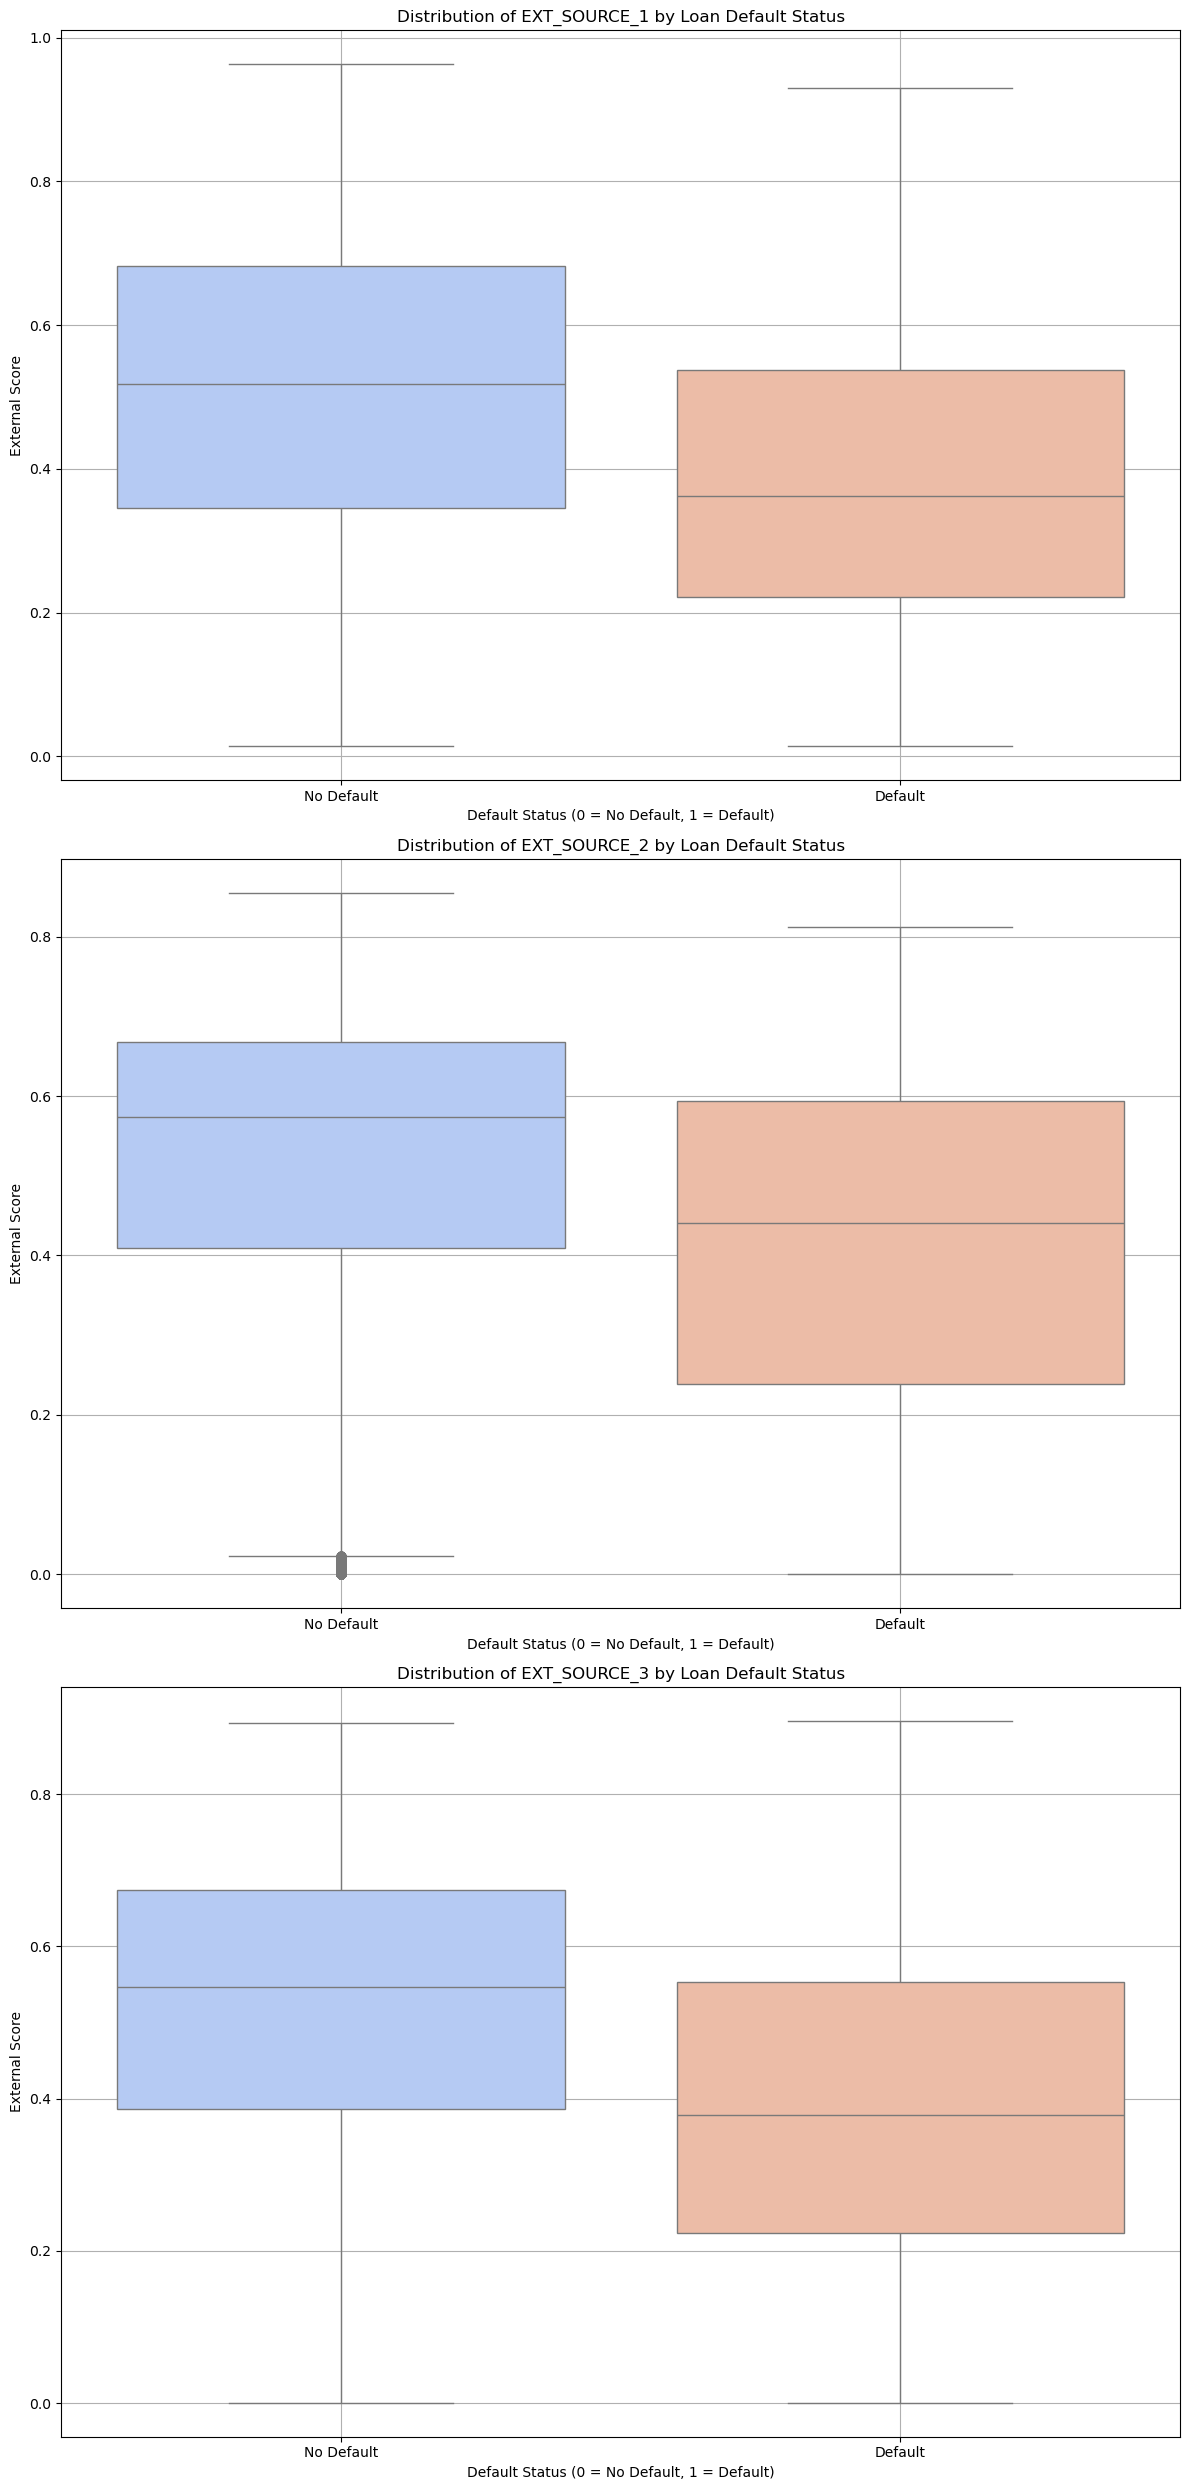

In [194]:
# List of external credit score columns
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Set up the plotting area
plt.figure(figsize=(12, 25))

# Loop through each external source and create a box plot
for i, col in enumerate(ext_source_cols, 1):
    plt.subplot(3, 1, i)  # Create a subplot for each feature
    sns.boxplot(data=application_data, x='TARGET', y=col, palette='coolwarm')
    plt.title(f"Distribution of {col} by Loan Default Status")
    plt.xlabel("Default Status (0 = No Default, 1 = Default)")
    plt.ylabel("External Score")
    plt.xticks([0, 1], ['No Default', 'Default'])
    plt.grid(True)

plt.tight_layout()
plt.show()


### Dưới đây là các biểu đồ so sánh giữa khách hàng vỡ nợ và không vỡ nợ dựa trên các đặc điểm liên quan đến bất động sản:

1. **Diện tích trung bình của khu vực sinh sống**: So sánh diện tích trung bình của khu vực sinh sống giữa khách hàng vỡ nợ và không vỡ nợ. Kết quả cho thấy khách hàng không vỡ nợ có xu hướng có diện tích sinh sống trung bình cao hơn một chút so với khách hàng vỡ nợ.

2. **Diện tích trung bình của khu vực đất**: So sánh diện tích trung bình của khu vực đất sở hữu giữa khách hàng có và không vỡ nợ. Sự chênh lệch về diện tích đất trung bình giữa hai nhóm không rõ rệt.

3. **Diện tích trung bình của khu vực công cộng**: So sánh diện tích trung bình của khu vực công cộng giữa khách hàng có và không vỡ nợ. Không có sự khác biệt đáng kể giữa hai nhóm khách hàng.

4. **Diện tích trung bình của tầng hầm**: So sánh diện tích trung bình của tầng hầm giữa khách hàng có và không vỡ nợ. Khách hàng không vỡ nợ có xu hướng sở hữu diện tích tầng hầm trung bình lớn hơn so với khách hàng vỡ nợ.

Những biểu đồ này cung cấp góc nhìn về mối quan hệ giữa các đặc điểm bất động sản và nguy cơ nợ xấu của khách hàng.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2813305134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='LIVINGAREA_AVG', palette='coolwarm')


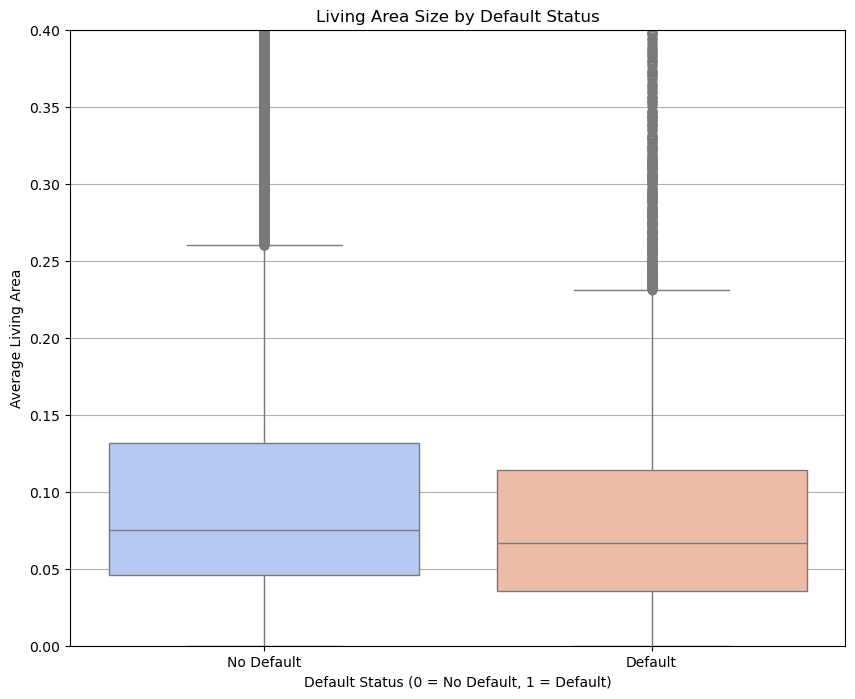

In [202]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=application_data, x='TARGET', y='LIVINGAREA_AVG', palette='coolwarm')
plt.title("Living Area Size by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Average Living Area")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2551340987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='LANDAREA_AVG', palette='viridis')


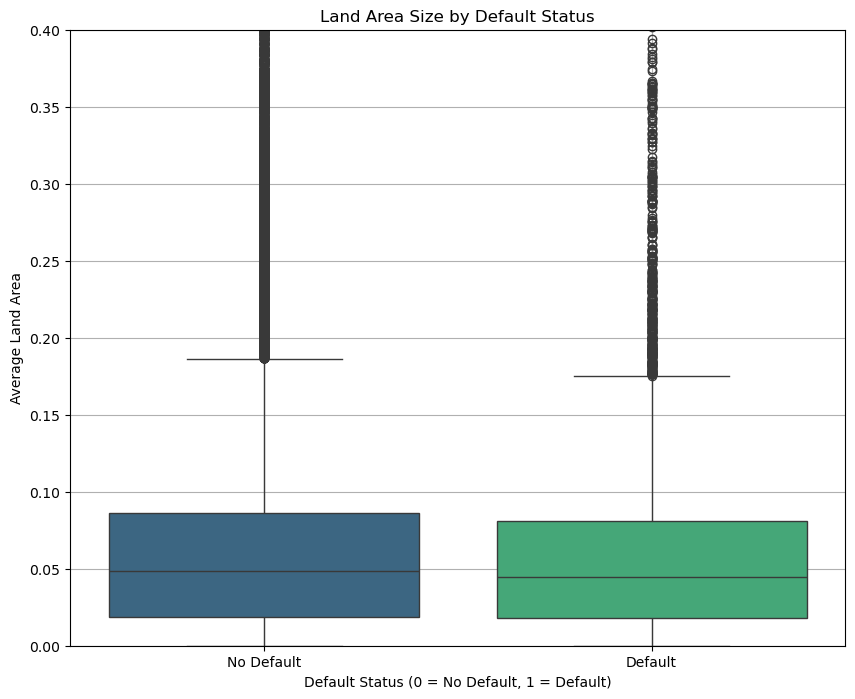

In [203]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=application_data, x='TARGET', y='LANDAREA_AVG', palette='viridis')
plt.title("Land Area Size by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Average Land Area")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/676502904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='COMMONAREA_AVG', palette='magma')


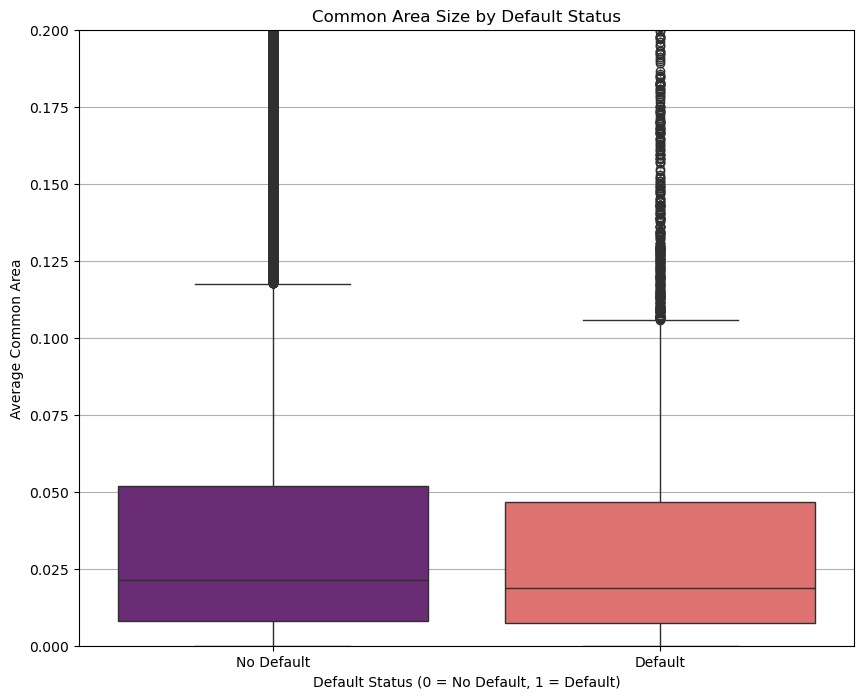

In [205]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=application_data, x='TARGET', y='COMMONAREA_AVG', palette='magma')
plt.title("Common Area Size by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Average Common Area")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(True)
plt.ylim(0, 0.2)
plt.show()

/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2302398230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='BASEMENTAREA_AVG', palette='Accent')


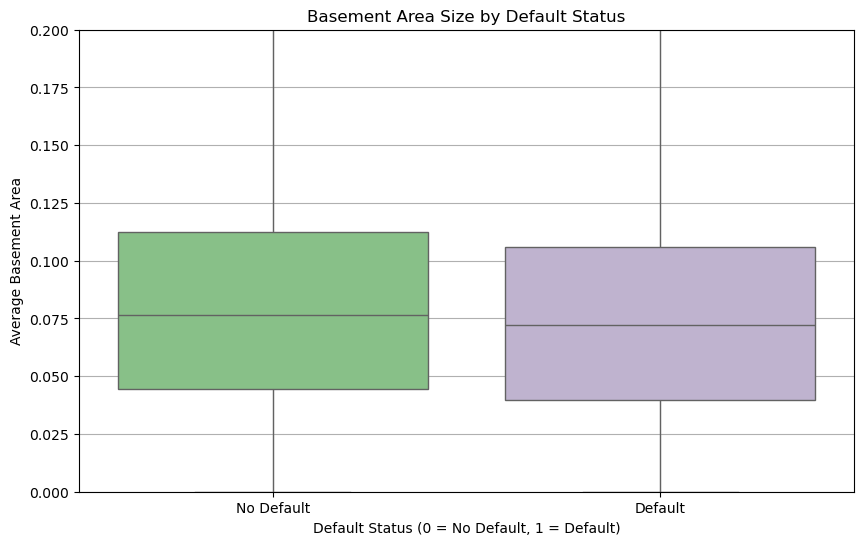

In [219]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=application_data, x='TARGET', y='BASEMENTAREA_AVG', palette='Accent')
plt.title("Basement Area Size by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Average Basement Area")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylim(0, 0.2)
plt.grid(True)
plt.show()


### Biểu đồ dưới đây so sánh số lượng yêu cầu tín dụng hàng năm tại các cơ quan tín dụng giữa khách hàng vỡ nợ và khách hàng không vỡ nợ. 
Kết quả cho thấy rằng khách hàng vỡ nợ có xu hướng có số lượng yêu cầu tín dụng hàng năm tại các cơ quan tín dụng cao hơn một chút so với khách hàng không vỡ nợ. Tuy nhiên, sự khác biệt giữa hai nhóm không lớn và có nhiều trường hợp ngoại lệ ở cả hai nhóm, cho thấy có một số khách hàng có số lượng yêu cầu rất cao.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2393703140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='AMT_REQ_CREDIT_BUREAU_YEAR', palette='twilight')


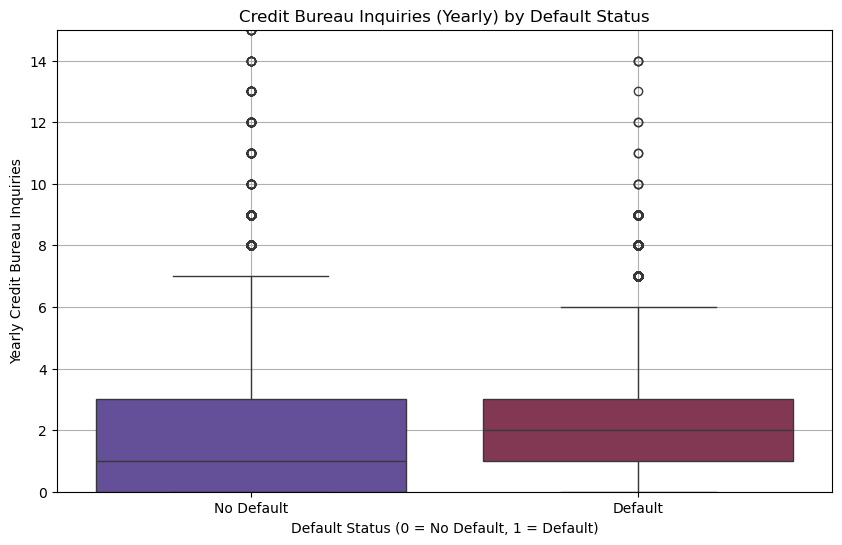

In [211]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=application_data, x='TARGET', y='AMT_REQ_CREDIT_BUREAU_YEAR', palette='twilight')
plt.title("Credit Bureau Inquiries (Yearly) by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Yearly Credit Bureau Inquiries")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(True)
plt.ylim(0, 15)
plt.show()

### Phân bố Diện Tích Tổng Thể Trung Bình Theo Tình Trạng Vỡ Nợ

Biểu đồ dưới đây so sánh diện tích tổng thể trung bình của bất động sản giữa khách hàng vỡ nợ và khách hàng không vỡ nợ. Kết quả cho thấy rằng diện tích trung bình của bất động sản sở hữu bởi khách hàng không vỡ nợ có xu hướng cao hơn một chút so với khách hàng vỡ nợ, nhưng sự khác biệt không quá lớn. 


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1829686251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=application_data, x='TARGET', y='TOTALAREA_MODE', palette='coolwarm')


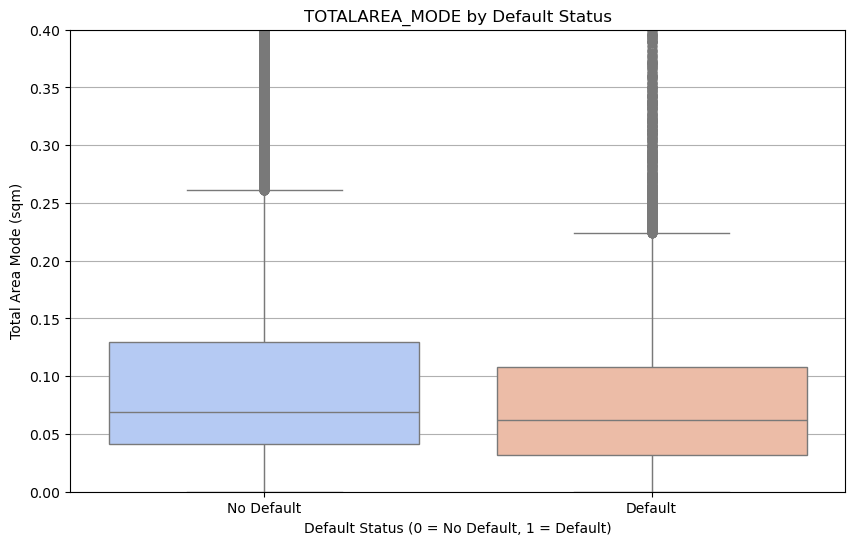

In [301]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=application_data, x='TARGET', y='TOTALAREA_MODE', palette='coolwarm')
plt.title("TOTALAREA_MODE by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Total Area Mode (sqm)")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(True)
plt.ylim(0, 0.4)
plt.show()

# **Tìm hiểu về tỉ lệ không trả được nợ(Default Rate), dựa trên dữ liệu về những khoản vay hiện tại và cả những khoản vay trước đây của mỗi khách hàng hiện tại**

### Tỷ Lệ Vỡ Nợ Theo Loại Hợp Đồng Vay Trước Đây (Top 3)

Biểu đồ dưới đây cho thấy sự phân bổ của ba loại hợp đồng vay phổ biến nhất trong các đơn vay trước đây của những khách hàng hiện tại, được phân loại theo trạng thái vỡ nợ. Dữ liệu này được chuẩn hóa để hiển thị tỷ lệ phần trăm mỗi loại hợp đồng vay cho từng khách hàng, sau đó tính tỷ lệ trung bình theo trạng thái vỡ nợ.

Trong biểu đồ, khách hàng vỡ nợ và không vỡ nợ có tỷ lệ vay tiêu dùng cao nhất. Đáng chú ý, khách hàng vỡ nợ có tỷ lệ vay khoản vay bằng tiền mặt cao hơn một chút so với khách hàng không vỡ nợ, cho thấy loại hợp đồng này có thể có mối liên hệ nhất định với khả năng vỡ nợ.



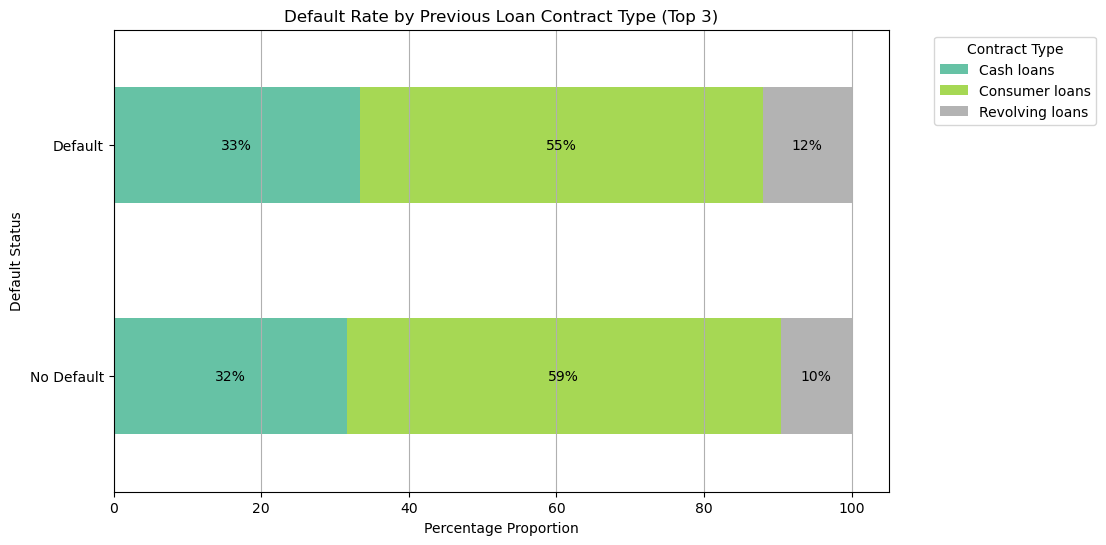

In [332]:
# Group by SK_ID_CURR and NAME_CONTRACT_TYPE, then calculate the frequency of each contract type
contract_type_counts = previous_application.groupby(['SK_ID_CURR', 'NAME_CONTRACT_TYPE']).size().unstack(fill_value=0)

# Keep only the three most frequent contract types
top_contract_types = contract_type_counts.sum().sort_values(ascending=False).head(3).index
contract_type_counts = contract_type_counts[top_contract_types]

# Normalize counts by total for each SK_ID_CURR to get proportions
contract_type_counts = contract_type_counts.div(contract_type_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(contract_type_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
contract_type_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
contract_type_default_rate.drop("SK_ID_CURR", axis = 1, inplace = True)

# Plot as a horizontal stacked bar chart with correct percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
contract_type_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]  # Format as integer percentages
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Previous Loan Contract Type (Top 3)")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Contract Type", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()


### Tỷ Lệ Vỡ Nợ Theo Tình Trạng Hợp Đồng Vay (Top 3)

Biểu đồ dưới đây cho thấy tỷ lệ phần trăm của ba tình trạng hợp đồng vay phổ biến nhất trong các đơn vay trước đây của những khách hàng hiện tại, được phân loại theo trạng thái vỡ nợ. Mỗi loại hợp đồng được chuẩn hóa để phản ánh tỷ lệ phần trăm trong tổng số đơn vay cho từng khách hàng.

Kết quả cho thấy, cả khách hàng vỡ nợ và không vỡ nợ đều có tỷ lệ đơn vay được phê duyệt cao nhất. Tuy nhiên, khách hàng vỡ nợ có tỷ lệ đơn vay bị từ chối cao hơn so với khách hàng không vỡ nợ, gợi ý rằng tình trạng hợp đồng bị từ chối có thể là một yếu tố liên quan đến khả năng vỡ nợ.


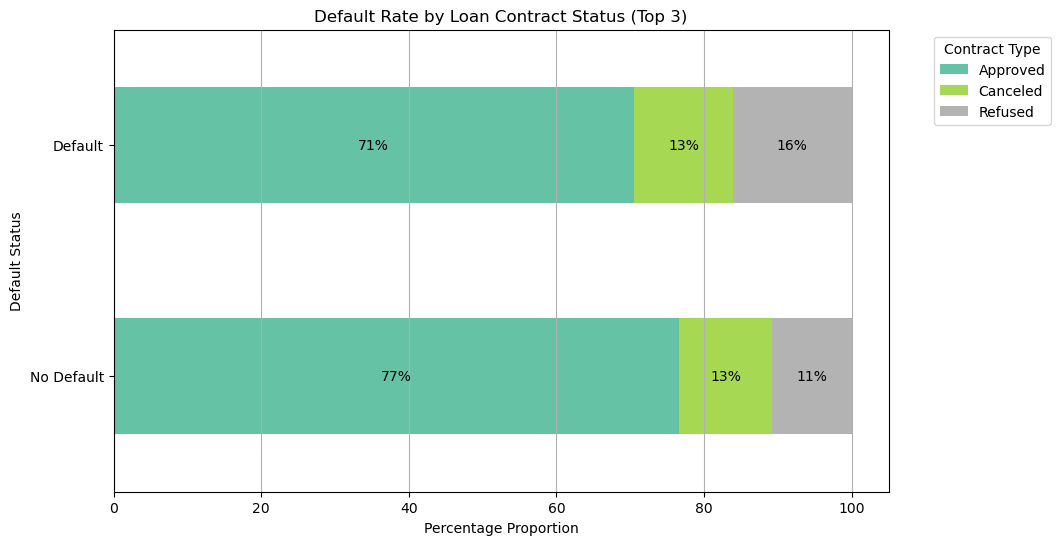

In [251]:
# Group by SK_ID_CURR and NAME_CONTRACT_STATUS, then calculate the frequency of each contract type
contract_status_counts = previous_application.groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)

# Keep only the three most frequent contract types
top_contract_status = contract_status_counts.sum().sort_values(ascending=False).head(3).index
contract_status_counts = contract_status_counts[top_contract_status]

# Normalize counts by total for each SK_ID_CURR to get proportions
contract_status_counts = contract_status_counts.div(contract_status_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(contract_status_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
contract_status_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
contract_status_default_rate.drop("SK_ID_CURR", axis = 1, inplace = True)

# Plot as a horizontal stacked bar chart with correct percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
contract_status_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]  # Format as integer percentages
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Loan Contract Status (Top 3)")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Contract Type", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()

### Số Lần Thanh Toán Trung Bình So Với Tỷ Lệ Vỡ Nợ

Biểu đồ dưới đây cho thấy số lần thanh toán trung bình của khách hàng dựa trên trạng thái vỡ nợ, sử dụng dữ liệu từ các đơn vay trước của khách hàng hiện tại. Trục hoành đại diện cho trạng thái vỡ nợ, trong đó "0" biểu thị khách hàng không vỡ nợ và "1" biểu thị khách hàng vỡ nợ.

Số lần thanh toán trung bình có xu hướng cao hơn đối với khách hàng vỡ nợ so với khách hàng không vỡ nợ, cho thấy một mối liên hệ tiềm năng giữa số lần thanh toán và khả năng vỡ nợ của khách hàng.



/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/2197907925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='TARGET', y='CNT_PAYMENT', palette='coolwarm')


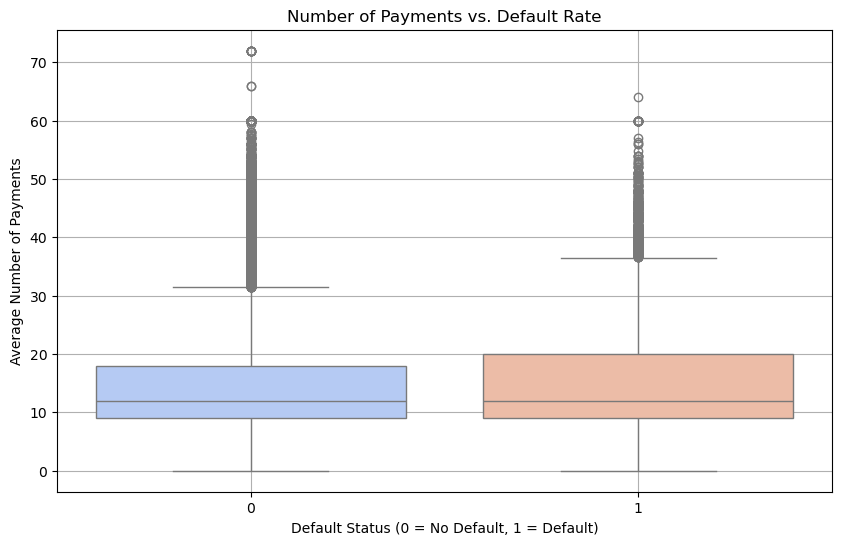

In [258]:
# Calculate the average number of payments for each SK_ID_CURR
payment_avg = previous_application.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean().reset_index()

# Merge with application data
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(payment_avg, on='SK_ID_CURR', how='left')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='TARGET', y='CNT_PAYMENT', palette='coolwarm')
plt.title("Number of Payments vs. Default Rate")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Average Number of Payments")
plt.grid(True)
plt.show()

### Tỷ Lệ Vỡ Nợ Theo Loại Hình Cùng Đi Kèm Khi Nộp Đơn Vay (Top 3)

Biểu đồ dưới đây thể hiện tỷ lệ phần trăm của các loại hình cùng đi kèm khi khách hàng nộp đơn vay trong những đơn vay trước đây của khách hàng hiện tại, được phân loại theo trạng thái vỡ nợ. Các loại hình này bao gồm "đi một mình," "đi cùng gia đình," "đi cùng vợ/chồng," và "đi cùng con cái."

Khách hàng vỡ nợ có tỷ lệ cao hơn trong danh mục "đi một mình" so với khách hàng không vỡ nợ, trong khi tỷ lệ khách hàng "đi cùng gia đình" cũng đáng kể trong cả hai nhóm. Điều này có thể cung cấp thông tin về mối quan hệ giữa loại hình cùng đi kèm và khả năng vỡ nợ của khách hàng.


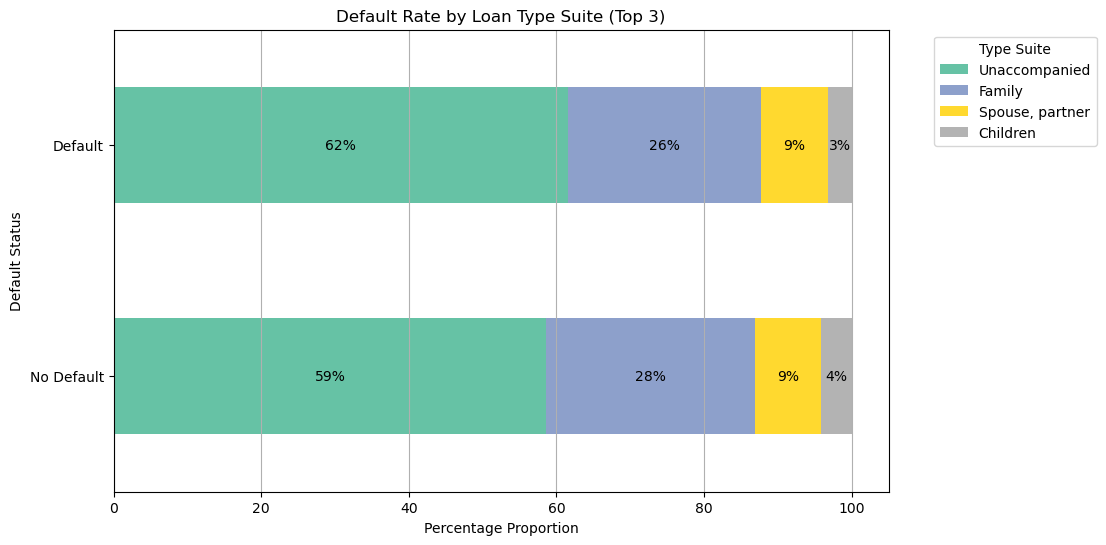

In [279]:
# Group by SK_ID_CURR and NAME_TYPE_SUITE, then calculate the frequency of each suite type
type_suite_counts = previous_application.groupby(['SK_ID_CURR', 'NAME_TYPE_SUITE']).size().unstack(fill_value=0)

# Keep only the three most frequent suite types
top_type_suite = type_suite_counts.sum().sort_values(ascending=False).head(4).index
type_suite_counts = type_suite_counts[top_type_suite]

# Normalize counts by total for each SK_ID_CURR to get proportions
type_suite_counts = type_suite_counts.div(type_suite_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(type_suite_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
type_suite_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
type_suite_default_rate.drop("SK_ID_CURR", axis = 1, inplace = True)

# Plot as a horizontal stacked bar chart with correct percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
type_suite_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Loan Type Suite (Top 3)")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Type Suite", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()

### Tỷ Lệ Vỡ Nợ Theo Loại Danh Mục Hợp Đồng Vay (Top 5)

Biểu đồ dưới đây cho thấy tỷ lệ phần trăm của các loại danh mục hợp đồng vay trong những đơn vay trước đây của khách hàng hiện tại, được phân loại theo trạng thái vỡ nợ. Các danh mục này đại diện cho các loại sản phẩm tài chính khác nhau như POS, tiền mặt, thẻ tín dụng, và xe hơi.

Khách hàng vỡ nợ có tỷ lệ thấp hơn trong danh mục "POS" so với khách hàng không vỡ nợ, trong khi danh mục "thẻ tín dụng" và "tiền mặt" xuất hiện với tần suất cao hơn ở nhóm khách hàng không vỡ nợ. Điều này có thể gợi ý rằng loại danh mục hợp đồng vay có ảnh hưởng đến khả năng vỡ nợ của khách hàng.


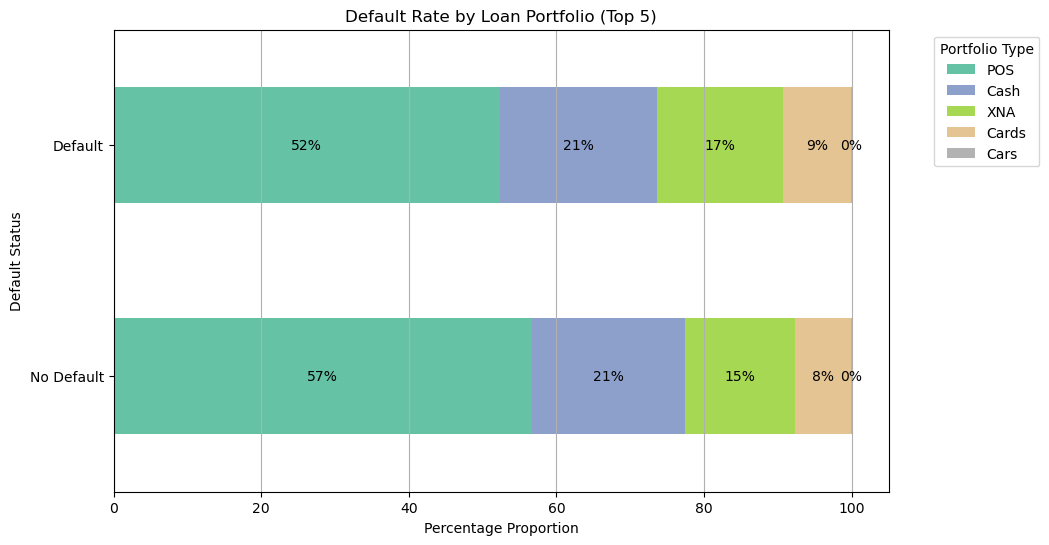

In [276]:
# Group by SK_ID_CURR and NAME_PORTFOLIO, then calculate the frequency of each portfolio type
portfolio_counts = previous_application.groupby(['SK_ID_CURR', 'NAME_PORTFOLIO']).size().unstack(fill_value=0)

# Keep only the three most frequent portfolio types
top_portfolio = portfolio_counts.sum().sort_values(ascending=False).head(5).index
portfolio_counts = portfolio_counts[top_portfolio]

# Normalize counts by total for each SK_ID_CURR to get proportions
portfolio_counts = portfolio_counts.div(portfolio_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(portfolio_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
portfolio_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
portfolio_default_rate.drop("SK_ID_CURR", axis = 1, inplace = True)

# Plot as a horizontal stacked bar chart with correct percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
portfolio_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Loan Portfolio (Top 5)")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Portfolio Type", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()


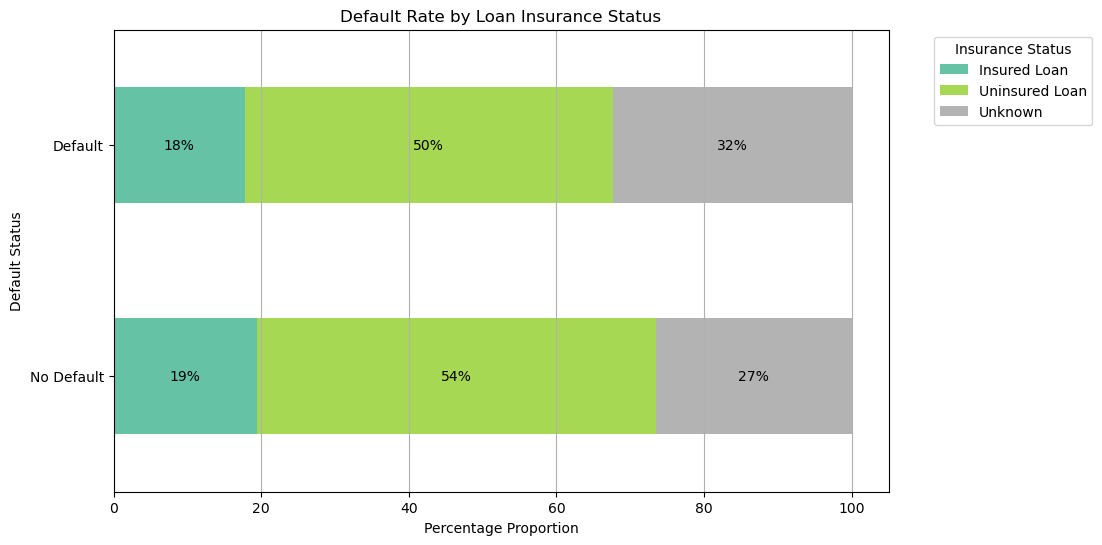

In [282]:
# Replace NaN with "Unknown" and map 1.0 to "Insured Loan" and 0.0 to "Uninsured Loan"
previous_application['INSURANCE_STATUS'] = previous_application['NFLAG_INSURED_ON_APPROVAL'].map({1.0: 'Insured Loan', 0.0: 'Uninsured Loan'}).fillna('Unknown')

# Group by SK_ID_CURR and INSURANCE_STATUS, then calculate the frequency of each insurance status
insurance_status_counts = previous_application.groupby(['SK_ID_CURR', 'INSURANCE_STATUS']).size().unstack(fill_value=0)

# Keep only the three insurance categories ("Insured Loan," "Uninsured Loan," and "Unknown")
insurance_status_counts = insurance_status_counts[['Insured Loan', 'Uninsured Loan', 'Unknown']]

# Normalize counts by total for each SK_ID_CURR to get proportions
insurance_status_counts = insurance_status_counts.div(insurance_status_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(insurance_status_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
insurance_status_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
insurance_status_default_rate.drop("SK_ID_CURR", axis=1, inplace=True)

# Plot as a horizontal stacked bar chart with accurate percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
insurance_status_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]  # Format as integer percentages
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Loan Insurance Status")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Insurance Status", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()

### Tỷ Lệ Vỡ Nợ Theo Nhóm Lợi Suất Hợp Đồng Vay

Biểu đồ dưới đây thể hiện tỷ lệ phần trăm của các nhóm lợi suất trong những đơn vay trước đây của khách hàng hiện tại, được phân loại theo trạng thái vỡ nợ. Các nhóm lợi suất này phản ánh các mức độ lợi nhuận từ các khoản vay.

Khách hàng vỡ nợ có tỷ lệ cao hơn trong nhóm lợi suất "cao" so với khách hàng không vỡ nợ, trong khi khách hàng không vỡ nợ có xu hướng tập trung vào các nhóm lợi suất "thấp" và "trung bình". Điều này có thể cho thấy nhóm lợi suất của hợp đồng vay có mối liên quan nhất định đến khả năng vỡ nợ của khách hàng.


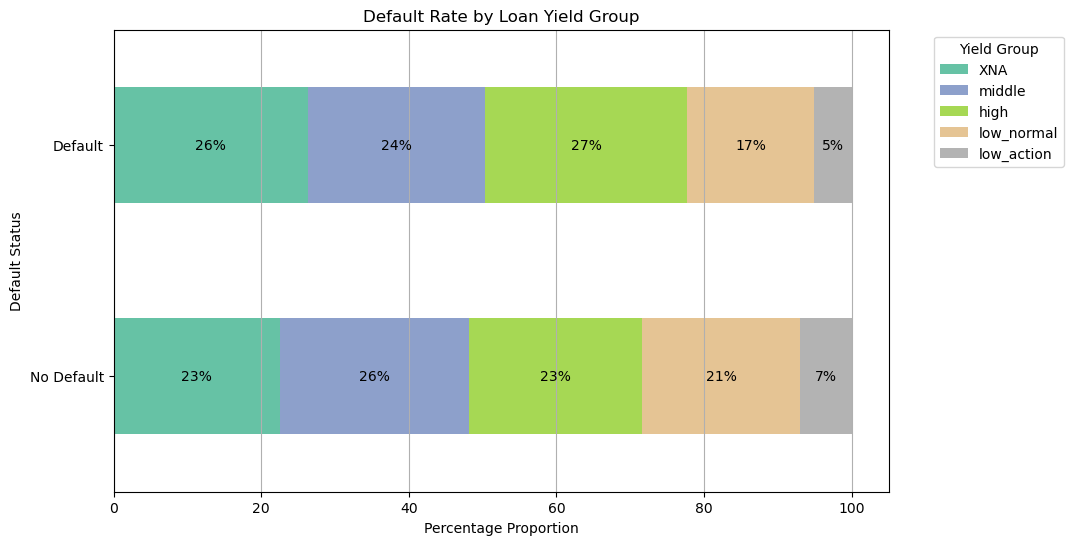

In [286]:
# Group by SK_ID_CURR and NAME_YIELD_GROUP, then calculate the frequency of each yield group
yield_group_counts = previous_application.groupby(['SK_ID_CURR', 'NAME_YIELD_GROUP']).size().unstack(fill_value=0)

# Keep only the top yield groups (if necessary, you can limit to top 3 or 5 based on frequency)
top_yield_groups = yield_group_counts.sum().sort_values(ascending=False).head(5).index
yield_group_counts = yield_group_counts[top_yield_groups]

# Normalize counts by total for each SK_ID_CURR to get proportions
yield_group_counts = yield_group_counts.div(yield_group_counts.sum(axis=1), axis=0)

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(yield_group_counts, on='SK_ID_CURR', how='left')

# Calculate the average proportions by default status
yield_group_default_rate = merged_data.groupby('TARGET').mean() * 100  # Convert to percentage
yield_group_default_rate.drop("SK_ID_CURR", axis=1, inplace=True)

# Plot as a horizontal stacked bar chart with accurate percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
yield_group_default_rate.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Add accurate percentage labels
for container in ax.containers:
    labels = [f'{v:.0f}%' for v in container.datavalues]  # Format as integer percentages
    ax.bar_label(container, labels=labels, label_type='center')

# Customize plot
plt.title("Default Rate by Loan Yield Group")
plt.xlabel("Percentage Proportion")
plt.ylabel("Default Status")
plt.yticks([0, 1], ['No Default', 'Default'])
plt.legend(title="Yield Group", bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()

## Tỷ lệ Nợ trên Giá trị (LTV) theo Tình trạng Vỡ Nợ

Biểu đồ dưới đây thể hiện tỷ lệ Nợ trên Giá trị (Loan-to-Value Ratio, LTV) trung bình của khách hàng không vỡ nợ (bên trái) và khách hàng vỡ nợ (bên phải). Tỷ lệ LTV được tính toán dựa trên dữ liệu các khoản vay trước đây của các khách hàng hiện tại.

- **Trục Y**: Tỷ lệ Nợ trên Giá trị (LTV)
- **Trục X**: Tình trạng Vỡ Nợ (0 = Không vỡ nợ, 1 = Vỡ nợ)

Khách hàng không vỡ nợ có xu hướng có tỷ lệ LTV nằm dưới 1, trong khi khách hàng vỡ nợ có xu hướng phân bố rộng hơn, với một số trường hợp có LTV cao hơn 1.


/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1525583578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='TARGET', y='LTV', palette='coolwarm')


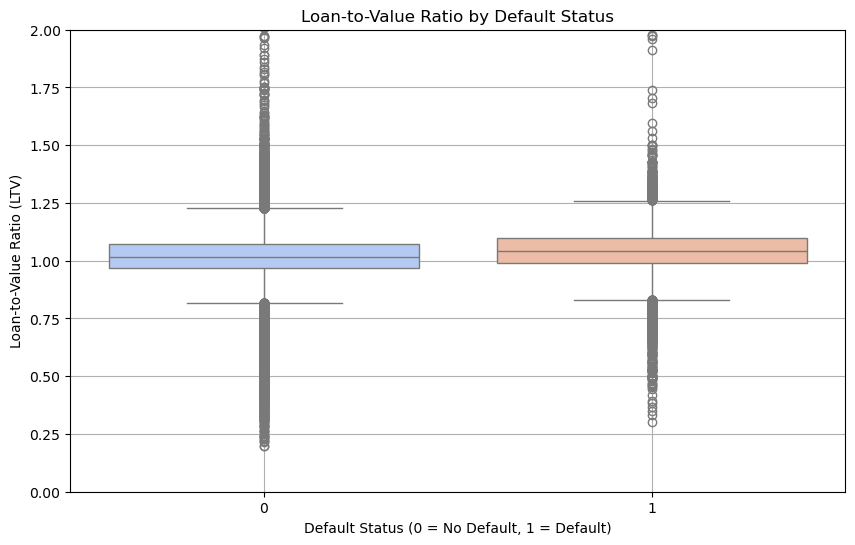

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the financial indicator: Loan-to-Value Ratio (LTV)
previous_application['LTV'] = previous_application['AMT_CREDIT'] / previous_application['AMT_GOODS_PRICE']

# Group by SK_ID_CURR and calculate the mean for LTV
ltv_data = previous_application.groupby('SK_ID_CURR')['LTV'].mean().reset_index()

# Merge with application data to get TARGET
merged_data = application_data[['SK_ID_CURR', 'TARGET']].merge(ltv_data, on='SK_ID_CURR', how='left')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='TARGET', y='LTV', palette='coolwarm')
plt.title("Loan-to-Value Ratio by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Loan-to-Value Ratio (LTV)")
plt.grid(True)
plt.ylim(0, 2)

# Show the plot
plt.show()

## Tỷ Lệ Thanh Toán So Với Khoản Vay Theo Trạng Thái Vỡ Nợ

Biểu đồ này so sánh tỷ lệ thanh toán so với khoản vay trung bình của các khách hàng không vỡ nợ (bên trái) và khách hàng vỡ nợ (bên phải), dựa trên dữ liệu các khoản vay trước đó của họ.



/var/folders/kg/981chym54f147n0pfd03h4dr0000gn/T/ipykernel_95814/1496002001.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data_payment_loan, x='TARGET', y='Payment_to_Loan_Ratio', palette='coolwarm')


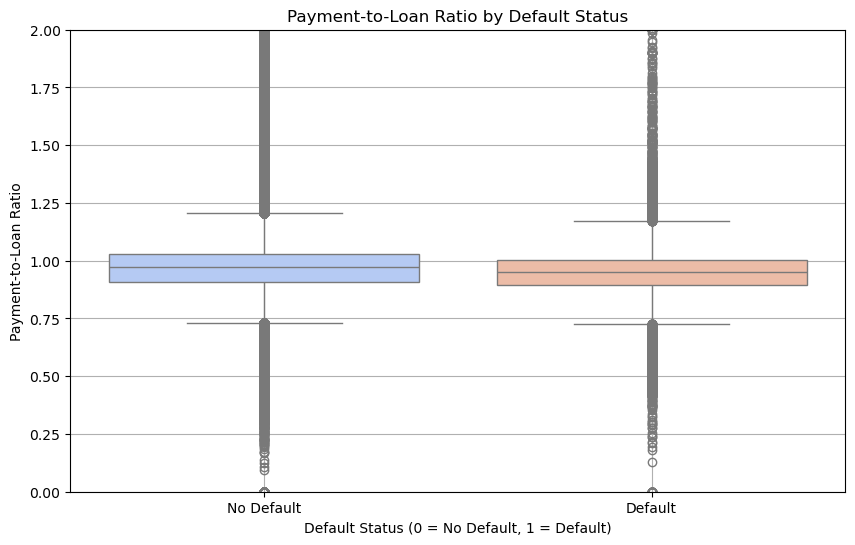

In [293]:
# Calculate Payment-to-Loan Ratio for each previous loan
previous_application['Payment_to_Loan_Ratio'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']

# Group by SK_ID_CURR to get the average Payment-to-Loan Ratio for each applicant
payment_to_loan_avg = previous_application.groupby('SK_ID_CURR')['Payment_to_Loan_Ratio'].mean().reset_index()

# Merge with the main application data to get TARGET
merged_data_payment_loan = application_data[['SK_ID_CURR', 'TARGET']].merge(payment_to_loan_avg, on='SK_ID_CURR', how='left')

# Drop any rows with NaN in Payment_to_Loan_Ratio
merged_data_payment_loan = merged_data_payment_loan.dropna(subset=['Payment_to_Loan_Ratio'])

# Plot the Payment-to-Loan Ratio by Default Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_payment_loan, x='TARGET', y='Payment_to_Loan_Ratio', palette='coolwarm')
plt.title("Payment-to-Loan Ratio by Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Payment-to-Loan Ratio")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylim(0, 2)
plt.grid(True)
plt.show()